In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from Data import *
from LDNN import plotpred, accuracy

2023-12-09 23:02:00.005936: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Importing data

In [3]:
X_train, X_test, y_train, y_test = load_data("K1_mi10_GRC.csv", "MinMax" ,False)

X features: 
   Erm/Sci  Scm/Po  conf
0    39.76     0.2    90
1    39.76     0.2    80
2    39.76     0.2    70
3    39.76     0.2    60
4    39.76     0.2    50
Y features: 
   strain
0   0.126
1   0.260
2   0.380
3   0.500
4   0.640


In [4]:
m = X_train.shape[0]

## 2 layer model

In [14]:
# Build the neural network model
model2l = keras.Sequential([
    layers.Dense(6, activation='relu', input_shape=(3,)),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model2l.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model2l.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
11/11 [==============================] - 3s 6ms/step - loss: 31.1584
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 31.0769
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 31.0025
Epoch 4/100
11/11 [==============================] - 0s 25ms/step - loss: 30.9277
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 30.8616
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 30.7983
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 30.7356
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 30.6764
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 30.6160
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 30.5556
Epoch 11/100
11/11 [==============================] - 0s 10ms/step - loss: 30.5036
Epoch 12/100
11/11 [==============================] - 0s 9ms/step - loss: 30.4457
Epoch 13/100
11/11 [=

11/11 [==============================] - 0s 5ms/step


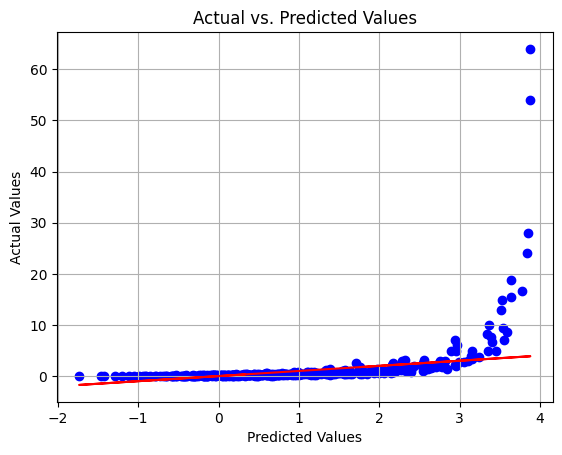

MSE for 2 layer model: 24.021742579098206
Accuracy for 2 layer model: 2.631578947368421


In [15]:
pred_train2l = model2l.predict(X_train)
plotpred(pred_train2l, y_train)
mse2l = np.mean((y_train - pred_train2l) ** 2)
print("MSE for 2 layer model:", mse2l)
print("Accuracy for 2 layer model:", accuracy(pred_train2l, y_train, 0.05))

3/3 [==============================] - 0s 36ms/step


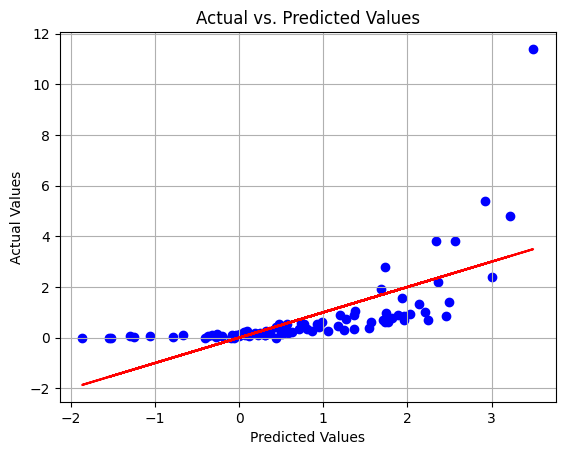

MSE for 2 layer model test set: 1.3952983605835938
Accuracy for 2 layer model test set: 1.1627906976744187


In [18]:
pred_test2l = model2l.predict(X_test)
plotpred(pred_test2l, y_test)
mse2l = np.mean((y_test - pred_test2l) ** 2)
print("MSE for 2 layer model test set:", mse2l)
print("Accuracy for 2 layer model test set:", accuracy(pred_test2l, y_test, 0.05))

## 4 Layer model

In [28]:
# Build the neural network model
model4l = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=(3,)),
    layers.Dense(5, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model4l.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model4l.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
11/11 [==============================] - 4s 6ms/step - loss: 31.1362
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 31.0220
Epoch 3/100
11/11 [==============================] - 0s 6ms/step - loss: 30.9292
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 30.8381
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 30.7444
Epoch 6/100
11/11 [==============================] - 0s 9ms/step - loss: 30.6547
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 30.5510
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 30.4647
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 30.3605
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 30.2647
Epoch 11/100
11/11 [==============================] - 0s 10ms/step - loss: 30.1673
Epoch 12/100
11/11 [==============================] - 0s 6ms/step - loss: 30.0735
Epoch 13/100
11/11 [==

### Prediction for 4 layer model

11/11 [==============================] - 1s 16ms/step


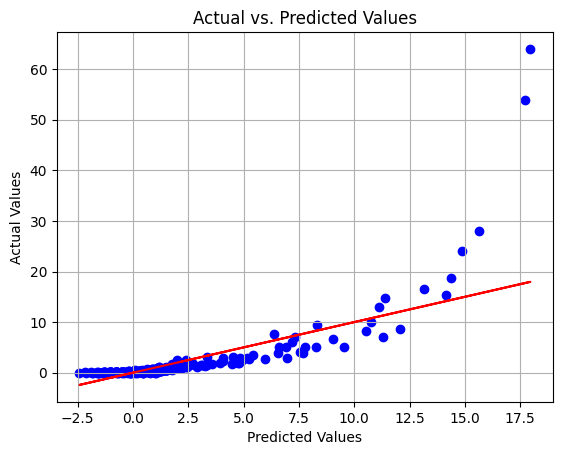

MSE for 2 layer model test set: 12.0805204828799
2.3391812865497075


In [29]:
pred_train4l = model4l.predict(X_train)
plotpred(pred_train4l, y_train)
mse4l = np.mean((y_train - pred_train4l) ** 2)
print("MSE for 2 layer model test set:", mse4l)
print(accuracy(pred_train4l, y_train))

3/3 [==============================] - 0s 5ms/step


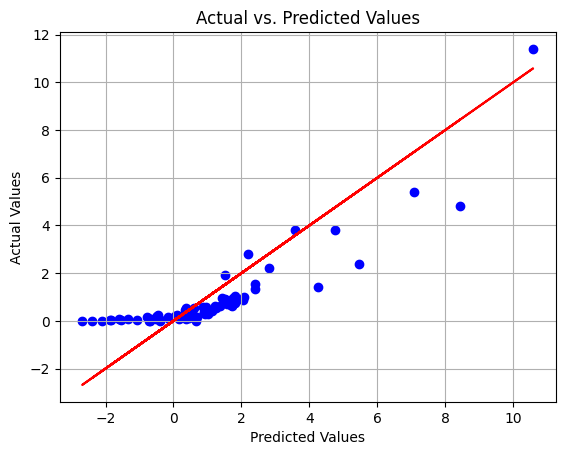

MSE for 2 layer model test set: 1.124054385547185
0.0


In [30]:
pred_test4l = model4l.predict(X_test)
plotpred(pred_test4l, y_test)
mse4lt = np.mean((y_test - pred_test4l) ** 2)
print("MSE for 2 layer model test set:", mse4lt)
print(accuracy(pred_test4l, y_test))

## 4 Layer model with tanh

In [31]:
# Build the neural network model
model4tanh = keras.Sequential([
    layers.Dense(4, activation='tanh', input_shape=(3,)),
    layers.Dense(5, activation='tanh'),
    layers.Dense(6, activation='tanh'),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model4tanh.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model4tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
11/11 [==============================] - 6s 5ms/step - loss: 30.8490
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 30.6035
Epoch 3/100
11/11 [==============================] - 0s 13ms/step - loss: 30.4146
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 30.1973
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 30.0152
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 29.8387
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 29.7003
Epoch 8/100
11/11 [==============================] - 0s 9ms/step - loss: 29.5121
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 29.3588
Epoch 10/100
11/11 [==============================] - 0s 8ms/step - loss: 29.2224
Epoch 11/100
11/11 [==============================] - 0s 7ms/step - loss: 29.0686
Epoch 12/100
11/11 [==============================] - 0s 6ms/step - loss: 28.9258
Epoch 13/100
11/11 [====

11/11 [==============================] - 0s 5ms/step


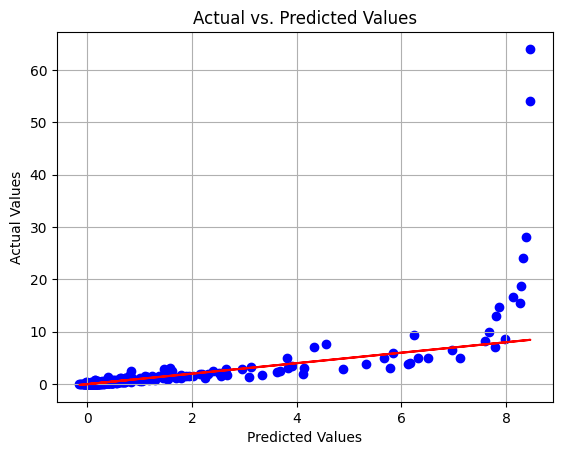

MSE for 2 layer model test set: 18.143978216502997
7.017543859649122


In [33]:
pred_train4tanh = model4tanh.predict(X_train)
plotpred(pred_train4tanh, y_train)
mse4ltanh = np.mean((y_train - pred_train4tanh) ** 2)
print("MSE for 2 layer model test set:", mse4ltanh)
print(accuracy(pred_train4tanh, y_train))

3/3 [==============================] - 0s 6ms/step


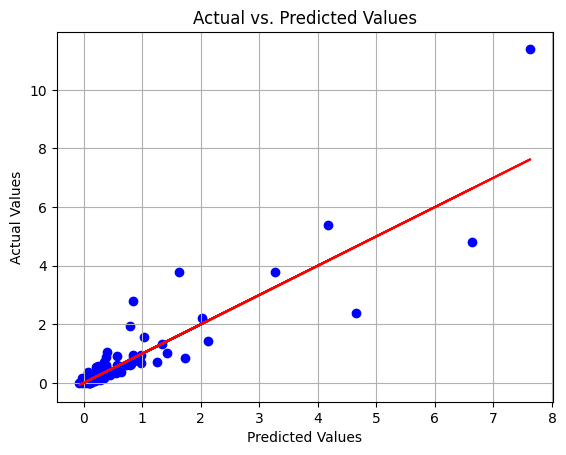

MSE for 2 layer model test set: 0.44849385351983956
5.813953488372093


In [35]:
pred_test4tanh = model4tanh.predict(X_test)
plotpred(pred_test4tanh, y_test)
mse4ltanht = np.mean((y_test - pred_test4tanh) ** 2)
print("MSE for 2 layer model test set:", mse4ltanht)
print(accuracy(pred_test4tanh, y_test))

## 7 layer tanh model

In [36]:
# Build the neural network model
model7tanh = keras.Sequential([
    layers.Dense(16, activation='tanh', input_shape=(3,)),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model7tanh.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model7tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
11/11 [==============================] - 6s 7ms/step - loss: 30.5960
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 29.8236
Epoch 3/100
11/11 [==============================] - 0s 16ms/step - loss: 28.9341
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 27.9190
Epoch 5/100
11/11 [==============================] - 0s 11ms/step - loss: 26.6931
Epoch 6/100
11/11 [==============================] - 0s 15ms/step - loss: 25.2732
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 23.8564
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 22.9198
Epoch 9/100
11/11 [==============================] - 0s 15ms/step - loss: 21.9889
Epoch 10/100
11/11 [==============================] - 0s 9ms/step - loss: 21.5624
Epoch 11/100
11/11 [==============================] - 0s 7ms/step - loss: 20.8876
Epoch 12/100
11/11 [==============================] - 0s 12ms/step - loss: 20.4622
Epoch 13/100
11/1

11/11 [==============================] - 0s 5ms/step


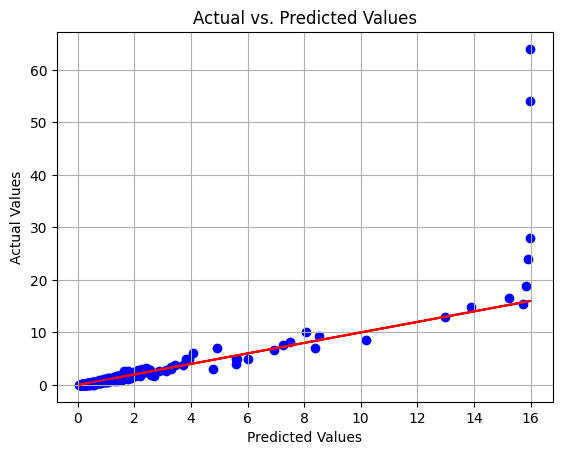

MSE for 2 layer model test set: 11.749408008510528
4.385964912280701


In [37]:
pred_train7tanh = model7tanh.predict(X_train)
plotpred(pred_train7tanh, y_train)
mse7ltanh = np.mean((y_train - pred_train7tanh) ** 2)
print("MSE for 2 layer model test set:", mse7ltanh)
print(accuracy(pred_train7tanh, y_train))

3/3 [==============================] - 0s 5ms/step


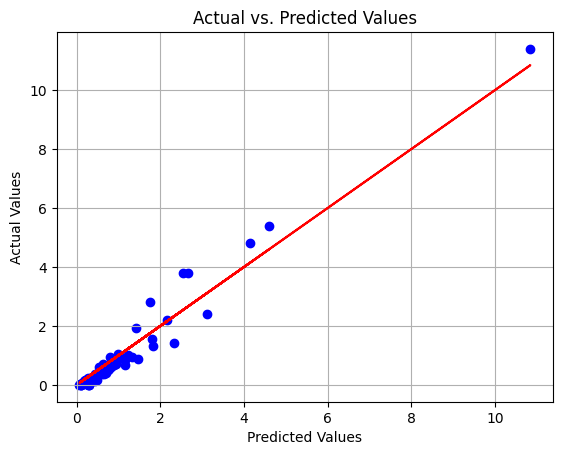

MSE for 2 layer model test set: 0.11697876501210953
2.3255813953488373


In [40]:
pred_test7tanh = model7tanh.predict(X_test)
plotpred(pred_test7tanh, y_test)
mse7ltanht = np.mean((y_test - pred_test7tanh) ** 2)
print("MSE for 2 layer model test set:", mse7ltanht)
print(accuracy(pred_test7tanh, y_test))

## 16 Layer tanh

In [41]:
# Build the neural network model
model16tanh = keras.Sequential([
    layers.Dense(24, activation='tanh', input_shape=(3,)),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(24, activation='tanh'),
    layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model16tanh.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model16tanh.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.0)

Epoch 1/100
11/11 [==============================] - 14s 21ms/step - loss: 29.8223
Epoch 2/100
11/11 [==============================] - 0s 12ms/step - loss: 28.7435
Epoch 3/100
11/11 [==============================] - 0s 29ms/step - loss: 27.7365
Epoch 4/100
11/11 [==============================] - 0s 23ms/step - loss: 26.1094
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 24.3746
Epoch 6/100
11/11 [==============================] - 0s 19ms/step - loss: 23.3541
Epoch 7/100
11/11 [==============================] - 0s 17ms/step - loss: 22.5023
Epoch 8/100
11/11 [==============================] - 0s 13ms/step - loss: 21.8288
Epoch 9/100
11/11 [==============================] - 0s 16ms/step - loss: 21.3170
Epoch 10/100
11/11 [==============================] - 0s 21ms/step - loss: 20.8393
Epoch 11/100
11/11 [==============================] - 0s 17ms/step - loss: 20.4065
Epoch 12/100
11/11 [==============================] - 0s 21ms/step - loss: 20.2893
Epoch 13/100

11/11 [==============================] - 1s 15ms/step


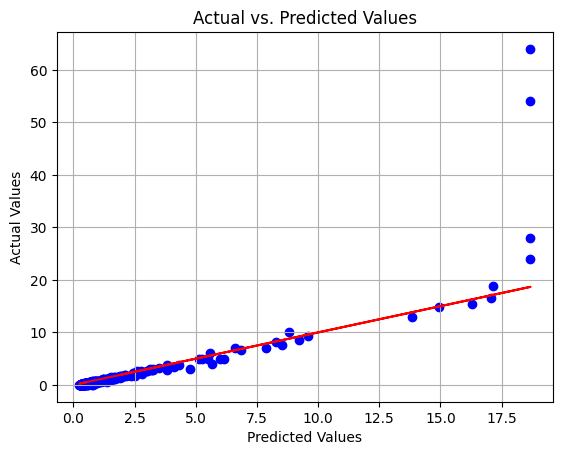

MSE for 2 layer model test set: 10.141383282021769
3.508771929824561


In [42]:
pred_train16tanh = model16tanh.predict(X_train)
plotpred(pred_train16tanh, y_train)
mse16ltanh = np.mean((y_train - pred_train16tanh) ** 2)
print("MSE for 2 layer model test set:", mse16ltanh)
print(accuracy(pred_train16tanh, y_train))

In [47]:
print("Predictions in margin of 10%: ",accuracy(pred_train16tanh, y_train, 0.9))

Predictions in margin of 10%:  54.67836257309941


3/3 [==============================] - 0s 6ms/step


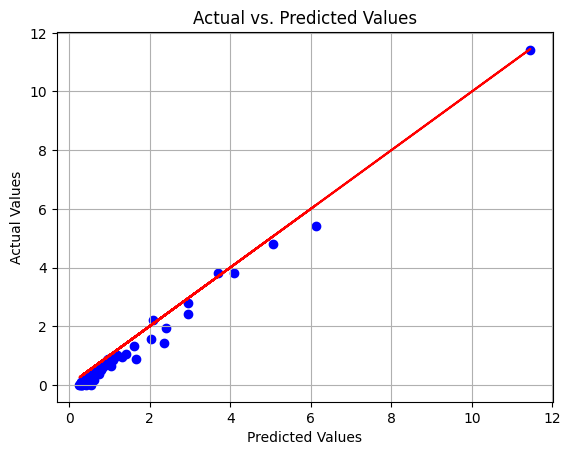

MSE for 2 layer model test set: 0.10195782881120706
2.3255813953488373


In [43]:
pred_test16tanh = model16tanh.predict(X_test)
plotpred(pred_test16tanh, y_test)
mse16ltanht = np.mean((y_test - pred_test16tanh) ** 2)
print("MSE for 2 layer model test set:", mse16ltanht)
print(accuracy(pred_test16tanh, y_test))